In [17]:
# IMPORT DES LIBRAIRIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import func as f
importlib.reload(f)

<module 'func' from '/Users/bastienalbizzati/Python/Projets-Git/2025-projet-S2-MMA-analyse-image/func.py'>

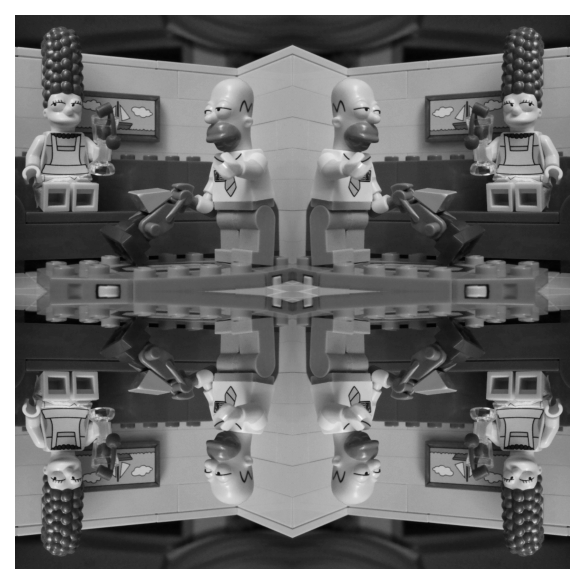

In [8]:
# Ouvrir l'image
p = plt.imread('simpson512g.png')
p4 = f.period_im(p)
M,N = p4.shape

# Affichage
plt.figure(dpi=150)
plt.imshow(p4,cmap='gray')
plt.axis('off')
plt.show()

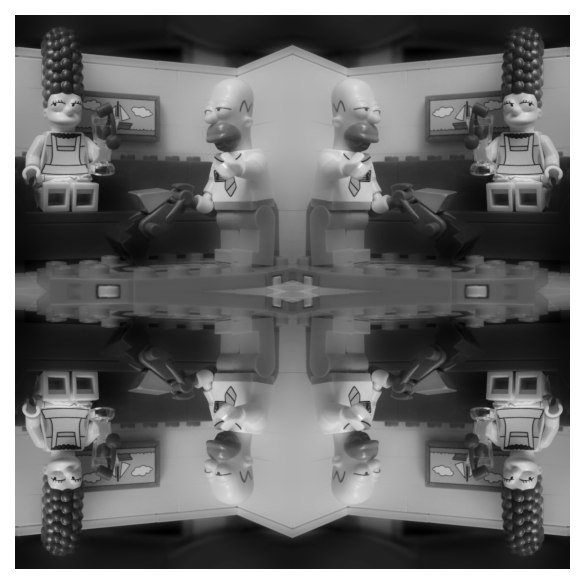

In [20]:
romega = 16 # rayon de la fenêtre
epsilon = 0.1 **2 # paramètre de régularisation
q = f.guided_f(p4,p4,romega,epsilon)

# Affichage
plt.figure(dpi=150)
plt.imshow(q,cmap='gray')
plt.axis('off')
plt.show()